In [1]:
import pandas as pd
import numpy as np

# Load the Excel file
df = pd.read_excel('training_mathbert.xlsx')

In [2]:
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_375,embed_376,embed_377,embed_378,embed_379,embed_380,embed_381,embed_382,embed_383,output
0,-0.089926,0.343874,0.176382,0.169358,-0.413337,-0.276315,0.188070,0.094621,0.330203,-0.258730,...,-0.272278,-0.230662,0.173143,-0.259786,-0.316996,-0.389919,0.105596,0.196438,0.117199,0.0
1,0.303261,0.084930,0.047369,-0.017244,-0.524733,-0.104934,0.335107,-0.081476,0.213762,-0.105293,...,-0.310262,-0.090271,0.129022,-0.008138,-0.220774,-0.021343,-0.029695,0.335977,-0.197539,0.0
2,-0.274291,0.216801,0.029110,0.259279,-0.655594,-0.289643,0.073369,0.014463,0.104336,-0.014190,...,-0.464926,-0.117493,-0.118993,-0.046860,0.010008,-0.118400,-0.085768,0.512956,0.023334,0.0
3,0.118676,0.095572,0.157358,0.225097,-0.632885,-0.125629,0.204013,0.074028,0.149310,-0.147779,...,-0.030543,-0.100965,0.236099,-0.286450,-0.130198,-0.051258,-0.047492,0.241473,-0.095162,0.0
4,0.298772,0.300674,0.366119,-0.022142,-0.748852,-0.035268,0.277504,0.075697,0.055439,-0.200804,...,-0.149575,-0.230057,0.296528,-0.526185,-0.251471,0.196795,-0.101786,0.570922,0.007743,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,-0.316305,0.126331,0.084587,0.099225,-0.503260,-0.062559,0.115574,0.012244,0.254925,-0.056957,...,-0.514027,-0.316320,0.013955,-0.030025,-0.306975,0.139429,-0.256867,0.331288,-0.045333,5.0
1122,-0.342471,0.060391,-0.009947,0.156623,-0.511338,-0.070624,0.140290,0.027731,0.275638,-0.068072,...,-0.595396,-0.419794,0.061882,-0.190783,-0.323777,0.185546,-0.144995,0.347215,-0.024521,5.0
1123,-0.379174,0.197136,0.149639,0.060261,-0.347212,-0.064022,0.119379,0.019028,0.268377,-0.188386,...,-0.517010,-0.354851,0.093440,-0.093673,-0.271739,0.042851,-0.143179,0.410811,-0.105163,5.0
1124,-0.379726,0.075891,0.100093,0.118006,-0.429774,-0.140415,0.120826,0.074879,0.154743,-0.030652,...,-0.683223,-0.428964,0.052585,-0.172558,-0.218717,0.201938,-0.085569,0.345646,-0.032904,5.0


In [3]:
df.columns.tolist()

['embed_0',
 'embed_1',
 'embed_2',
 'embed_3',
 'embed_4',
 'embed_5',
 'embed_6',
 'embed_7',
 'embed_8',
 'embed_9',
 'embed_10',
 'embed_11',
 'embed_12',
 'embed_13',
 'embed_14',
 'embed_15',
 'embed_16',
 'embed_17',
 'embed_18',
 'embed_19',
 'embed_20',
 'embed_21',
 'embed_22',
 'embed_23',
 'embed_24',
 'embed_25',
 'embed_26',
 'embed_27',
 'embed_28',
 'embed_29',
 'embed_30',
 'embed_31',
 'embed_32',
 'embed_33',
 'embed_34',
 'embed_35',
 'embed_36',
 'embed_37',
 'embed_38',
 'embed_39',
 'embed_40',
 'embed_41',
 'embed_42',
 'embed_43',
 'embed_44',
 'embed_45',
 'embed_46',
 'embed_47',
 'embed_48',
 'embed_49',
 'embed_50',
 'embed_51',
 'embed_52',
 'embed_53',
 'embed_54',
 'embed_55',
 'embed_56',
 'embed_57',
 'embed_58',
 'embed_59',
 'embed_60',
 'embed_61',
 'embed_62',
 'embed_63',
 'embed_64',
 'embed_65',
 'embed_66',
 'embed_67',
 'embed_68',
 'embed_69',
 'embed_70',
 'embed_71',
 'embed_72',
 'embed_73',
 'embed_74',
 'embed_75',
 'embed_76',
 'embed_7

In [4]:
'''
A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If
your data deals with multiple classes, you can take any two classes. 
'''
# Separate the output column from other columns of df
embed_cols = df.columns[:-1]  # copy all columns except the last one
label_col = df['output']

# Calculate the mean for each class (also called as class centroid)
class_means = df.groupby('output')[embed_cols].mean()

# Calculate spread (standard deviation) for each class
class_spreads = df.groupby('output')[embed_cols].std()

# Calculate the distance between mean vectors between classes
if len(class_means) > 1:  # To check if there are at least two classes
    centroid_0 = class_means.loc[0.0].values
    centroid_1 = class_means.loc[1.0].values
    interclass_distance = np.linalg.norm(centroid_0 - centroid_1)
else:
    interclass_distance = None

# Output 
print("Class mean vector (centroid):\n", class_means)
print("\nClass standard deviation (spread):\n", class_spreads)
print("\nInterclass Distance between class 0 and class 1:", interclass_distance)


Class mean vector (centroid):
          embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
output                                                                         
0.000  -0.153674  0.211456  0.155295  0.093863 -0.488665 -0.194348  0.140355   
0.250  -0.255277  0.263835  0.213473  0.191470 -0.306339 -0.075046  0.250660   
0.375  -0.239879  0.339333  0.293421  0.249637 -0.630448  0.360250  0.289443   
0.500  -0.232833  0.149298  0.124647  0.125998 -0.417329 -0.131600  0.131462   
0.625  -0.017249  0.081590 -0.080917  0.178040 -0.474333 -0.102767  0.450282   
...          ...       ...       ...       ...       ...       ...       ...   
4.500  -0.184671  0.044783  0.145434  0.239946 -0.526059 -0.191454  0.096636   
4.625  -0.241622  0.088098  0.096856  0.246243 -0.474478 -0.075730  0.194762   
4.750  -0.197596  0.035643  0.156991  0.234888 -0.483428 -0.271918  0.100167   
4.875  -0.183171  0.088280  0.122521  0.257218 -0.501180 -0.336450  0.267008   
5.000  -0

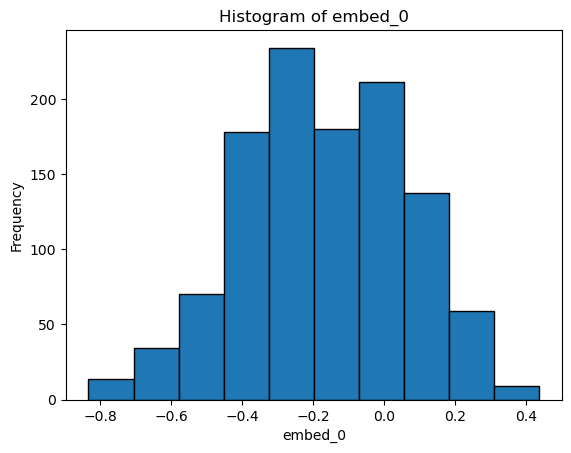

Mean of embed_0: -0.17029445322602035
Variance of embed_0: 0.05343827792925803


In [5]:
'''
A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and
variance from the available data. 
'''
import numpy as np
import matplotlib.pyplot as plt

# Select a feature from the dataset
selected_feature = 'embed_0'  

# Calculate the histogram data
hist_data, bin_edges = np.histogram(df[selected_feature], bins=10)  

# Plot the histogram
plt.hist(df[selected_feature], bins=10, edgecolor='black')
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_feature}')
plt.show()

# Calculate mean and variance
mean = np.mean(df[selected_feature])
variance = np.var(df[selected_feature])

print(f"Mean of {selected_feature}: {mean}")
print(f"Variance of {selected_feature}: {variance}")


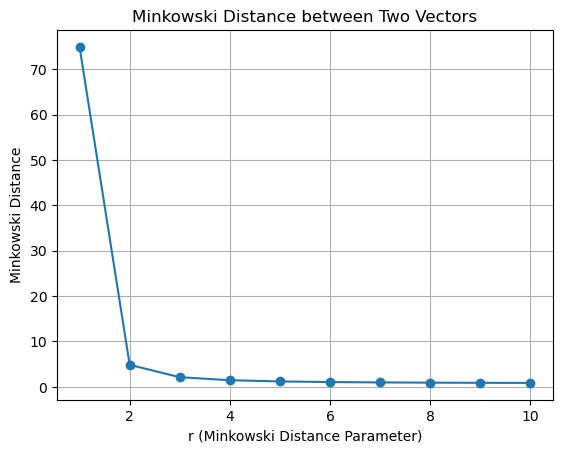

In [6]:
from scipy.spatial import distance

# Select any two feature vectors (rows) from the dataset
vector_1 = df.iloc[0, :-1].values  # Example: First row, excluding the class label
vector_2 = df.iloc[1, :-1].values  # Example: Second row, excluding the class label

# Calculate Minkowski distances for r from 1 to 10
minkowski_dist = []
r_values = list(range(1, 11))  # Create a list containing r values

for r in r_values:
  dist = distance.minkowski(vector_1, vector_2, r)
  minkowski_dist.append(dist)

# Plot of the distance and observe the nature of the graph
plt.plot(r_values, minkowski_dist, marker='o')
plt.xlabel('r (Minkowski Distance Parameter)')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Vectors')
plt.grid(True)
plt.show()

In [7]:
'''
A4. Divide dataset in your project into two parts - train & test set. To accomplish this, use the traintest_split() function available in SciKit.
'''
from sklearn.model_selection import train_test_split

# Define the feature matrix (X) and target vector (y)
X = df[embed_cols].values  # All features (columns) except the last 
y = df['output'].values  # Last columns 'output'

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the sizes of the train and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 788
Test set size: 338


In [8]:
'''A5. Train a kNN classifier (k =3) using the training set obtained from above exercise.'''
# Example: Binning the continuous labels into two classes
y_train_class = pd.cut(y_train, bins=2, labels=[0, 1])

from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier using the training set
knn_classifier.fit(X_train, y_train_class)

KNeighborsClassifier(n_neighbors=3)

In [9]:
'''
A6. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for help.
'''
# Test the accuracy of the kNN classifier on the test set
accuracy = knn_classifier.score(X_test, y_test)

# Output the accuracy
print(f"Accuracy of the kNN classifier: {accuracy * 100:.2f}%")

Accuracy of the kNN classifier: 33.33%


In [10]:
'''
A7. Use the predict() function to study the prediction behavior of the classifier for test vectors
Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the
class of the test vector (test_vect is any feature vector from your test set).
'''
# Use the kNN classifier to predict the class labels for the test set
predictions = knn_classifier.predict(X_test)

# Output the predictions and compare with actual labels
print("Predictions:", predictions)
print("Actual labels:", y_test)

# Select any test vector from your test set
test_vect = X_test[0].reshape(1, -1)  # Example: First vector from the test set

# Predict the class of the test vector using the trained kNN classifier
predicted_class = knn_classifier.predict(test_vect)

# Output the predicted class
print(f"Predicted class for the test vector: {predicted_class[0]}")



Predictions: [1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1]
Actual labels: [5.         5.         3.75       1.875      4.75       3.
 4.         2.91666667 5.         4.5        2.75       3.75
 4.5        3.         1.25       2.625      2.         2.375
 3.5        2.5        2.625      3.75       4.         3.
 2.75       2.5        2.5        1.        

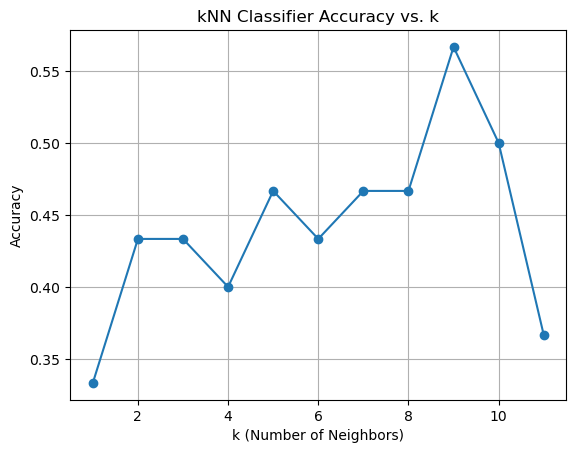

Accuracy with k=1: 33.33%
Accuracy with k=2: 43.33%
Accuracy with k=3: 43.33%
Accuracy with k=4: 40.00%
Accuracy with k=5: 46.67%
Accuracy with k=6: 43.33%
Accuracy with k=7: 46.67%
Accuracy with k=8: 46.67%
Accuracy with k=9: 56.67%
Accuracy with k=10: 50.00%
Accuracy with k=11: 36.67%


In [11]:
'''A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to
11 and make an accuracy plot.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Example continuous labels
y = np.random.rand(100) * 100  # Replace this with your actual y_train data

# Convert continuous labels to discrete classes (binning)
y_binned = np.digitize(y, bins=np.linspace(min(y), max(y), num=3))  # Binning into 3 classes

# Create a sample feature set X
X = np.random.rand(len(y), 5)  # Replace with your actual feature data

# Split the dataset
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# List to store accuracy for different values of k
k_values = list(range(1, 12))
accuracies = []

# Iterate over k values from 1 to 11
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_class)
    accuracy = knn.score(X_test, y_test_class)
    accuracies.append(accuracy)

# Plot the accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('kNN Classifier Accuracy vs. k')
plt.grid(True)
plt.show()

# Output accuracy values for comparison
for k, accuracy in zip(k_values, accuracies):
    print(f"Accuracy with k={k}: {accuracy * 100:.2f}%")

In [12]:
'''
A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).
'''

from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for both the training and test sets
train_predictions = knn_classifier.predict(X_train)
test_predictions = knn_classifier.predict(X_test)

# Evaluate the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix (Test Set):\n", conf_matrix)

# Calculate and print precision, recall, and F1-score for both training and test sets
print("\nClassification Report (Training Set):\n", classification_report(y_train, train_predictions))
print("Classification Report (Test Set):\n", classification_report(y_test, test_predictions))


Confusion Matrix (Test Set):
 [[9 9]
 [7 5]]

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        28
           1       0.94      0.76      0.84        42

    accuracy                           0.83        70
   macro avg       0.83      0.85      0.83        70
weighted avg       0.85      0.83      0.83        70

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.36      0.42      0.38        12

    accuracy                           0.47        30
   macro avg       0.46      0.46      0.46        30
weighted avg       0.48      0.47      0.47        30

